In [2]:
import pandas as pd
import matplotlib.pyplot as plt

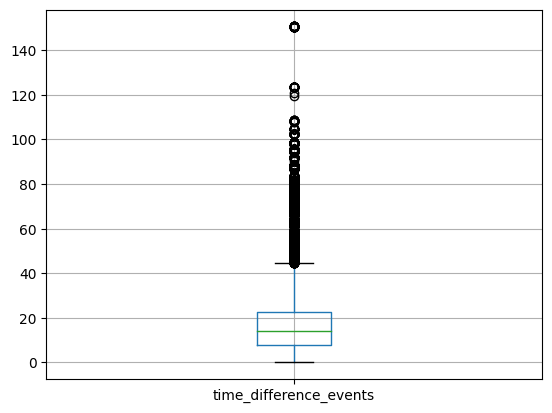

In [3]:
df = pd.read_csv('../analysis_table.csv')
ax = df.boxplot(column=['time_difference_events'])
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74651 entries, 0 to 74650
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             74651 non-null  object 
 1   event_time              74651 non-null  object 
 2   event_name              74651 non-null  object 
 3   _source                 74651 non-null  object 
 4   lag_event_time          52507 non-null  object 
 5   time_difference_events  52507 non-null  float64
 6   lag_event_name          52507 non-null  object 
 7   postal_code_group       67144 non-null  float64
dtypes: float64(2), object(6)
memory usage: 4.6+ MB


In [12]:
df_lag_irr=df[df['lag_event_name'].isna()]
df_lag_irr['event_name'].unique()

array(['first_order'], dtype=object)

In [7]:
df['lag_event_name'].unique()


array([nan, 'first_order', 'on_site_appointment', 'project_call',
       'final_call', 'event_name_unknown'], dtype=object)

In [53]:
df_time= df['time_difference_events']
print(df_time)
event_names = df['event_name'].unique()
print(event_names)

0          NaN
1        81.72
2         9.80
3         7.93
4          NaN
         ...  
74646     9.92
74647      NaN
74648    23.35
74649    24.95
74650     7.11
Name: time_difference_events, Length: 74651, dtype: float64
['first_order' 'on_site_appointment' 'project_call' 'final_call'
 'event_name_unknown']


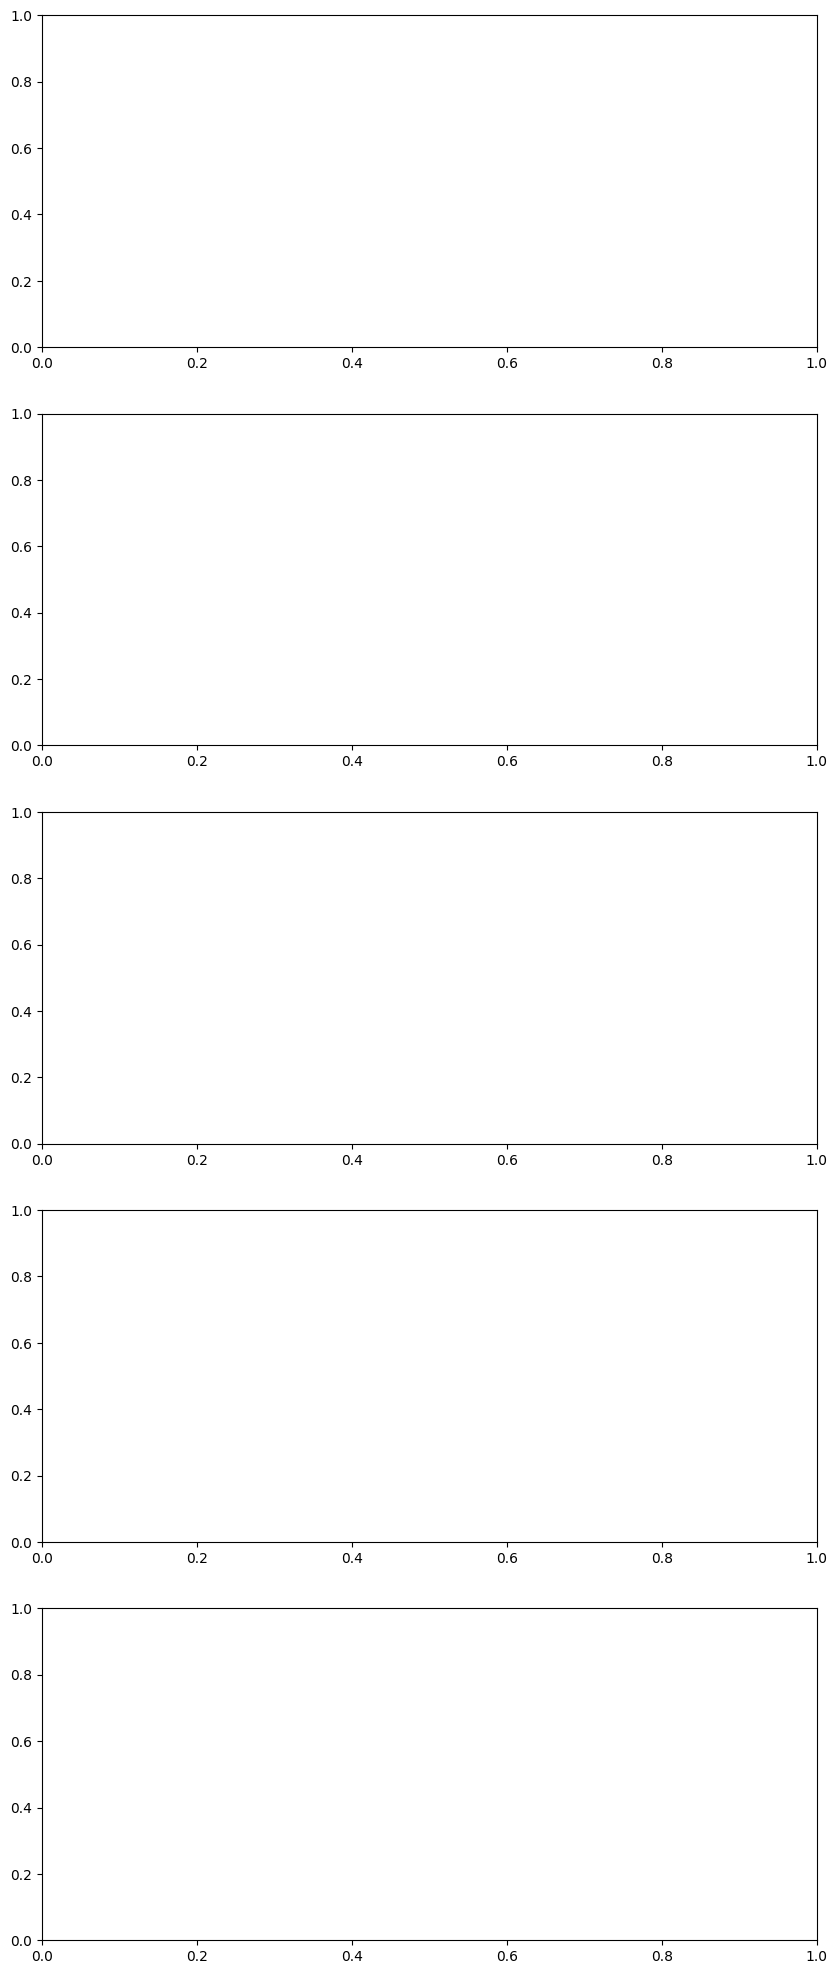

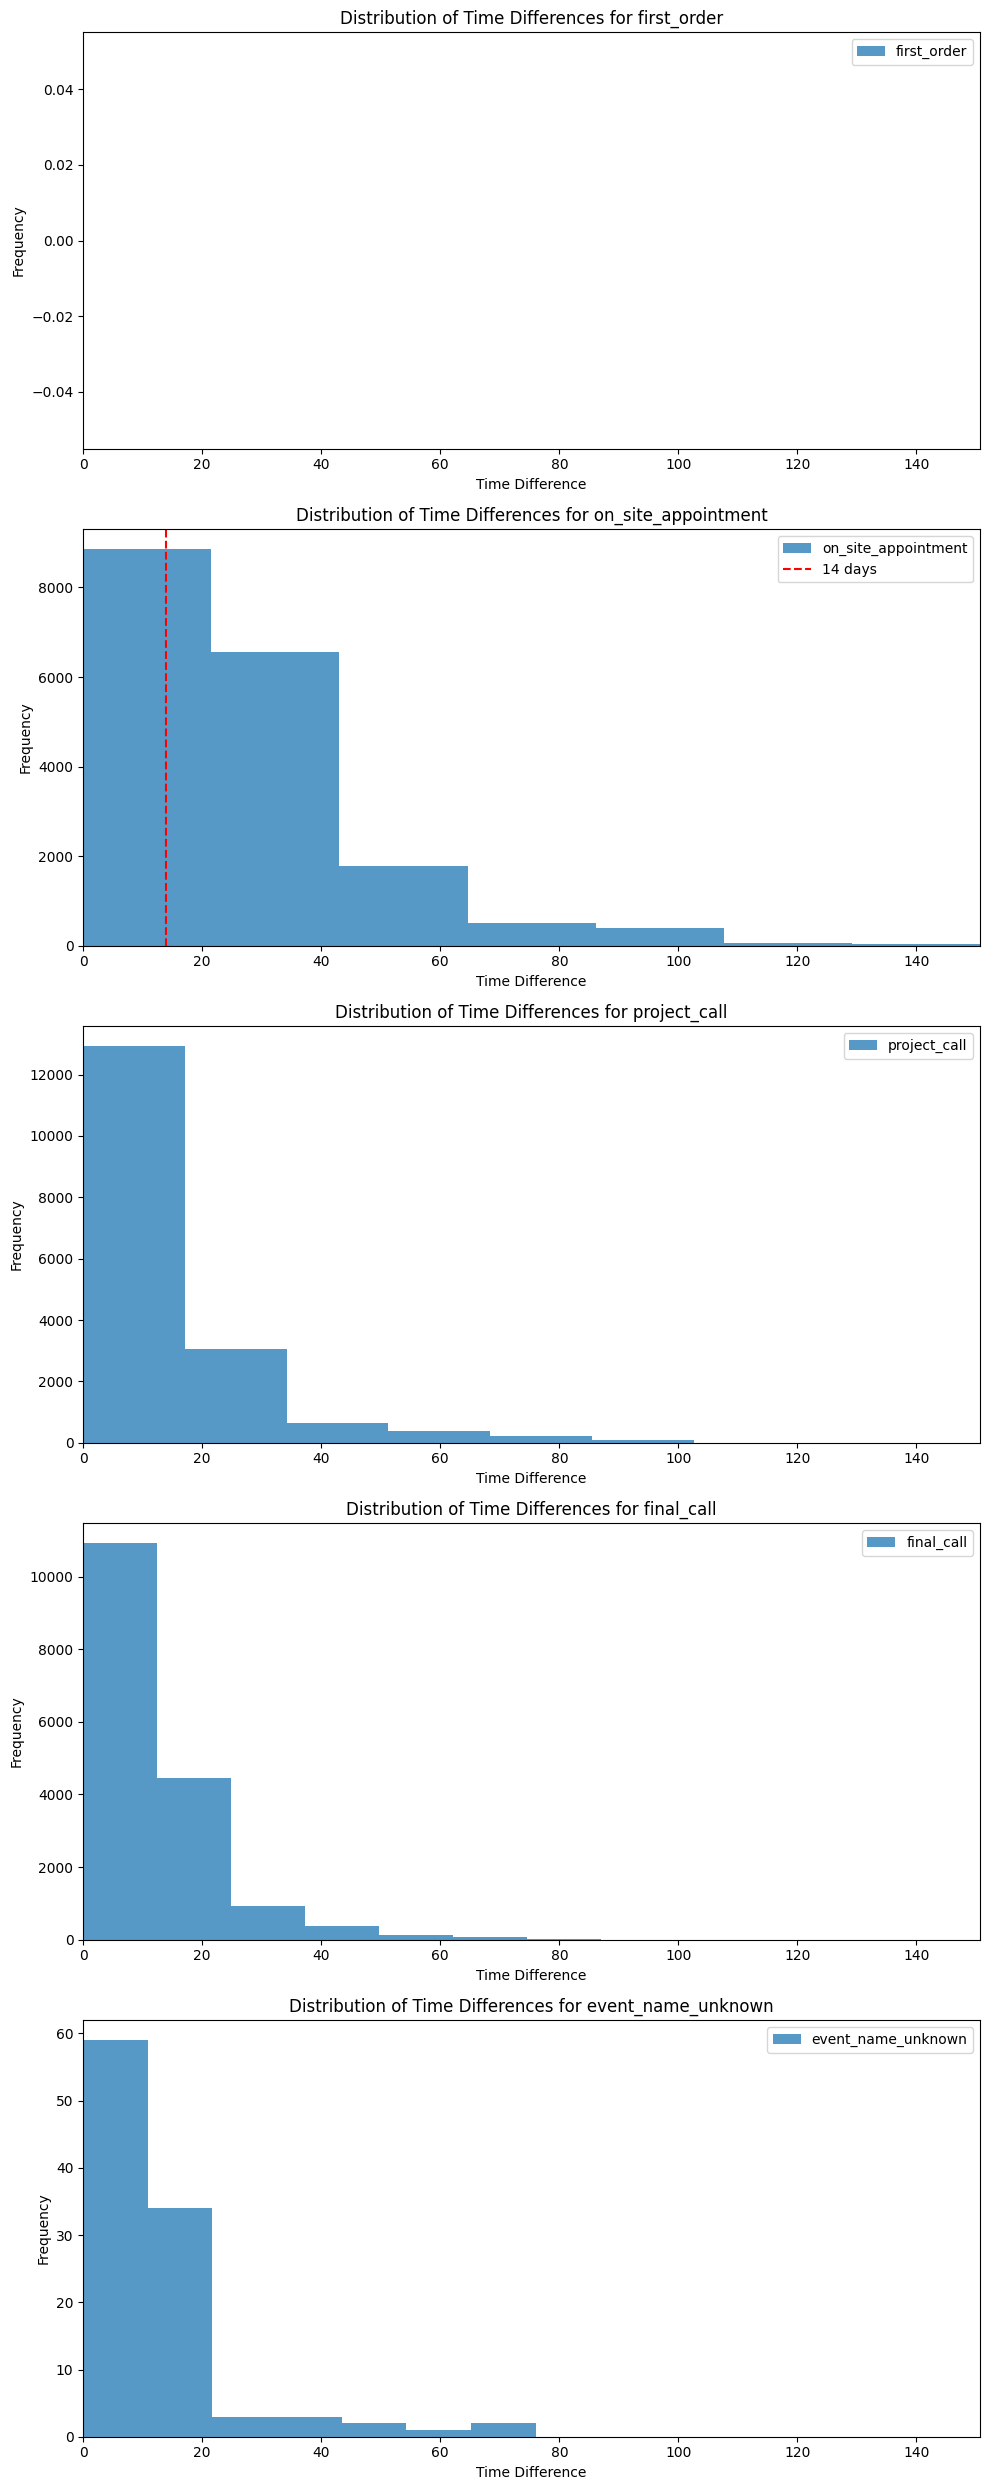

In [113]:
# Get unique event names
event_names = df['event_name'].unique()

x_min = df['time_difference_events'].min()
x_max = df['time_difference_events'].max()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(event_names), figsize=(10, 5 * len(event_names)))


# Plot each event in a separate subplot
for ax, event in zip(axes, event_names):
    subset = df[df['event_name'] == event]
    ax.hist(subset['time_difference_events'].dropna(), bins=7, alpha=0.75, label=str(event))
    ax.set_title(f'Distribution of Time Differences for {event}')
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Frequency')
    ax.legend()

    ax.set_xlim(x_min, x_max)
    if event == 'on_site_appointment':
        ax.axvline(x=14, color='r', linestyle='--', label='14 days')
        ax.legend()

plt.tight_layout()
plt.show()

In [103]:
#average and median for Groups df['']
#check for inconsistencies
#Group statistics
df_group=df.groupby(['event_name', "lag_event_name"])['time_difference_events'].agg(['median', 'mean', 'count']).reset_index()
print(df_group)

             event_name       lag_event_name  median       mean  count
0    event_name_unknown   event_name_unknown   5.980   5.980000      1
1    event_name_unknown           final_call   3.070   8.962667     15
2    event_name_unknown  on_site_appointment  10.540  16.146000     50
3    event_name_unknown         project_call   9.955  11.172368     38
4            final_call   event_name_unknown   7.925  10.261667     48
5            final_call           final_call   6.940  13.983980     98
6            final_call          first_order  55.380  53.179355     31
7            final_call  on_site_appointment  19.150  25.476727    495
8            final_call         project_call   8.260  11.753207  16230
9   on_site_appointment          first_order  21.680  27.652941  17986
10  on_site_appointment  on_site_appointment   0.045   0.631000     10
11  on_site_appointment         project_call   0.030   0.470695    187
12         project_call           final_call   1.000  14.533490    149
13    

In [102]:
#Analysis if sequence is better
df_new = pd.read_csv('../analysis_table.csv')
df_group_sequence=df_new.groupby(['event_name', "lag_event_name"])['time_difference_events'].agg(['median', 'mean', 'count']).reset_index()
print(df_group)


             event_name       lag_event_name  median       mean  count
0    event_name_unknown   event_name_unknown   5.980   5.980000      1
1    event_name_unknown           final_call   3.070   8.962667     15
2    event_name_unknown  on_site_appointment  10.540  16.146000     50
3    event_name_unknown         project_call   9.955  11.172368     38
4            final_call   event_name_unknown   7.925  10.261667     48
5            final_call           final_call   6.940  13.983980     98
6            final_call          first_order  55.380  53.179355     31
7            final_call  on_site_appointment  19.150  25.476727    495
8            final_call         project_call   8.260  11.753207  16230
9   on_site_appointment          first_order  21.680  27.652941  17986
10  on_site_appointment  on_site_appointment   0.045   0.631000     10
11  on_site_appointment         project_call   0.030   0.470695    187
12         project_call           final_call   1.000  14.533490    149
13    

In [110]:
df_inconsistencies=df[(df['event_name'] == 'final_call') & (df['lag_event_name']== 'first_order')]
df_inconsistencies

,customer_id,event_time,event_name,_source,lag_event_time,time_difference_events,lag_event_name,postal_code_group
4192,0dffe73664,2023-11-20 09:45:00,final_call,appointments_table,2023-09-26 02:00:00,55.32,first_order,NaN
11028,24f942d876,2023-11-20 09:45:00,final_call,appointments_table,2023-09-26 01:00:00,55.36,first_order,1.0
11127,256b2bd334,2023-11-20 11:30:00,final_call,appointments_table,2023-09-26 01:00:00,55.44,first_order,1.0
14293,2feed26bc0,2023-11-20 10:00:00,final_call,appointments_table,2023-09-26 01:00:00,55.38,first_order,1.0
14550,30d7b10723,2023-11-20 11:00:00,final_call,appointments_table,2023-09-26 02:00:00,55.38,first_order,1.0
14750,31859dfded,2023-11-20 10:45:00,final_call,appointments_table,2023-09-26 01:00:00,55.41,first_order,NaN
14810,31a5c518fe,2023-11-20 11:00:00,final_call,appointments_table,2023-09-26 02:00:00,55.38,first_order,1.0
16228,36129e0943,2023-11-20 10:15:00,final_call,appointments_table,2023-09-26 00:00:00,55.43,first_order,1.0
17521,3a575fbbb1,2023-10-27 19:15:00,final_call,appointments_table,2023-10-04 01:00:00,23.76,first_order,2.0
17789,3b593a6382,2023-11-20 12:00:00,final_call,appointments_table,2023-09-26 04:00:00,55.33,first_order,1.0


In [87]:
filtered_df = df[
    ~(df['event_name'] == 'event_name_unknown')&
    ~((df['event_name'] == 'final_call') & (df['lag_event_name'] == 'first_order')) &
    ~((df['event_name'] == 'final_call') & (df['lag_event_name'] == 'on_site_appointment')) &
    ~((df['event_name'] == 'project_call') & (df['lag_event_name'] == 'first_order'))
    ]

In [95]:
df_group_filtered=filtered_df.groupby(['event_name', "lag_event_name"])['time_difference_events'].agg(['median', 'mean', 'count']).reset_index()
print(df_group_filtered)

            event_name       lag_event_name  median       mean  count
0           final_call   event_name_unknown   7.925  10.261667     48
1           final_call           final_call   6.940  13.983980     98
2           final_call         project_call   8.260  11.753207  16230
3  on_site_appointment          first_order  21.680  27.652941  17986
4  on_site_appointment  on_site_appointment   0.045   0.631000     10
5  on_site_appointment         project_call   0.030   0.470695    187
6         project_call           final_call   1.000  14.533490    149
7         project_call  on_site_appointment  11.990  15.497363  16886
8         project_call         project_call  16.930  16.930000      1


In [94]:
filtered_df_high_values=filtered_df[filtered_df['time_difference_events']>50]
sorted_df_high_values = filtered_df_high_values.sort_values(by='time_difference_events', ascending=False)
sorted_df_high_values

,customer_id,event_name,_source,lag_event_time,time_difference_events,lag_event_name,postal_code_group
event_time,,,,,,,
2024-02-05 17:15:00,f11ca15cf7,on_site_appointment,appointments_table,2023-09-08 01:00:00,150.68,first_order,7.0
2024-02-05 16:00:00,80cb8ff3c5,on_site_appointment,appointments_table,2023-09-08 00:00:00,150.67,first_order,7.0
2024-02-05 17:30:00,c89ed13dbe,on_site_appointment,appointments_table,2023-09-08 02:00:00,150.65,first_order,7.0
2024-02-05 15:30:00,78b0766d7c,on_site_appointment,appointments_table,2023-09-08 00:00:00,150.65,first_order,7.0
2024-02-05 16:30:00,496f83be8f,on_site_appointment,appointments_table,2023-09-08 01:00:00,150.65,first_order,7.0
...,...,...,...,...,...,...,...
2024-01-10 15:30:00,2366493633,final_call,appointments_table,2023-11-21 10:00:00,50.23,project_call,3.0
2024-01-10 17:45:00,41b06471a2,final_call,appointments_table,2023-11-21 12:30:00,50.22,project_call,3.0
2024-01-10 15:30:00,5f9f8b829e,final_call,appointments_table,2023-11-21 10:30:00,50.21,project_call,3.0


In [96]:
df_high_values=df[df['time_difference_events']>50]
sorted_df_high_values = df_high_values.sort_values(by='time_difference_events', ascending=False)
sorted_df_high_values

,customer_id,event_time,event_name,_source,lag_event_time,time_difference_events,lag_event_name,postal_code_group
70218,f11ca15cf7,2024-02-05 17:15:00,on_site_appointment,appointments_table,2023-09-08 01:00:00,150.68,first_order,7.0
37642,80cb8ff3c5,2024-02-05 16:00:00,on_site_appointment,appointments_table,2023-09-08 00:00:00,150.67,first_order,7.0
58466,c89ed13dbe,2024-02-05 17:30:00,on_site_appointment,appointments_table,2023-09-08 02:00:00,150.65,first_order,7.0
35387,78b0766d7c,2024-02-05 15:30:00,on_site_appointment,appointments_table,2023-09-08 00:00:00,150.65,first_order,7.0
21937,496f83be8f,2024-02-05 16:30:00,on_site_appointment,appointments_table,2023-09-08 01:00:00,150.65,first_order,7.0
...,...,...,...,...,...,...,...,...
10527,2366493633,2024-01-10 15:30:00,final_call,appointments_table,2023-11-21 10:00:00,50.23,project_call,3.0
19727,41b06471a2,2024-01-10 17:45:00,final_call,appointments_table,2023-11-21 12:30:00,50.22,project_call,3.0
28134,5f9f8b829e,2024-01-10 15:30:00,final_call,appointments_table,2023-11-21 10:30:00,50.21,project_call,3.0
61439,d2d22c0275,2024-01-10 15:45:00,final_call,appointments_table,2023-11-21 11:30:00,50.18,project_call,3.0


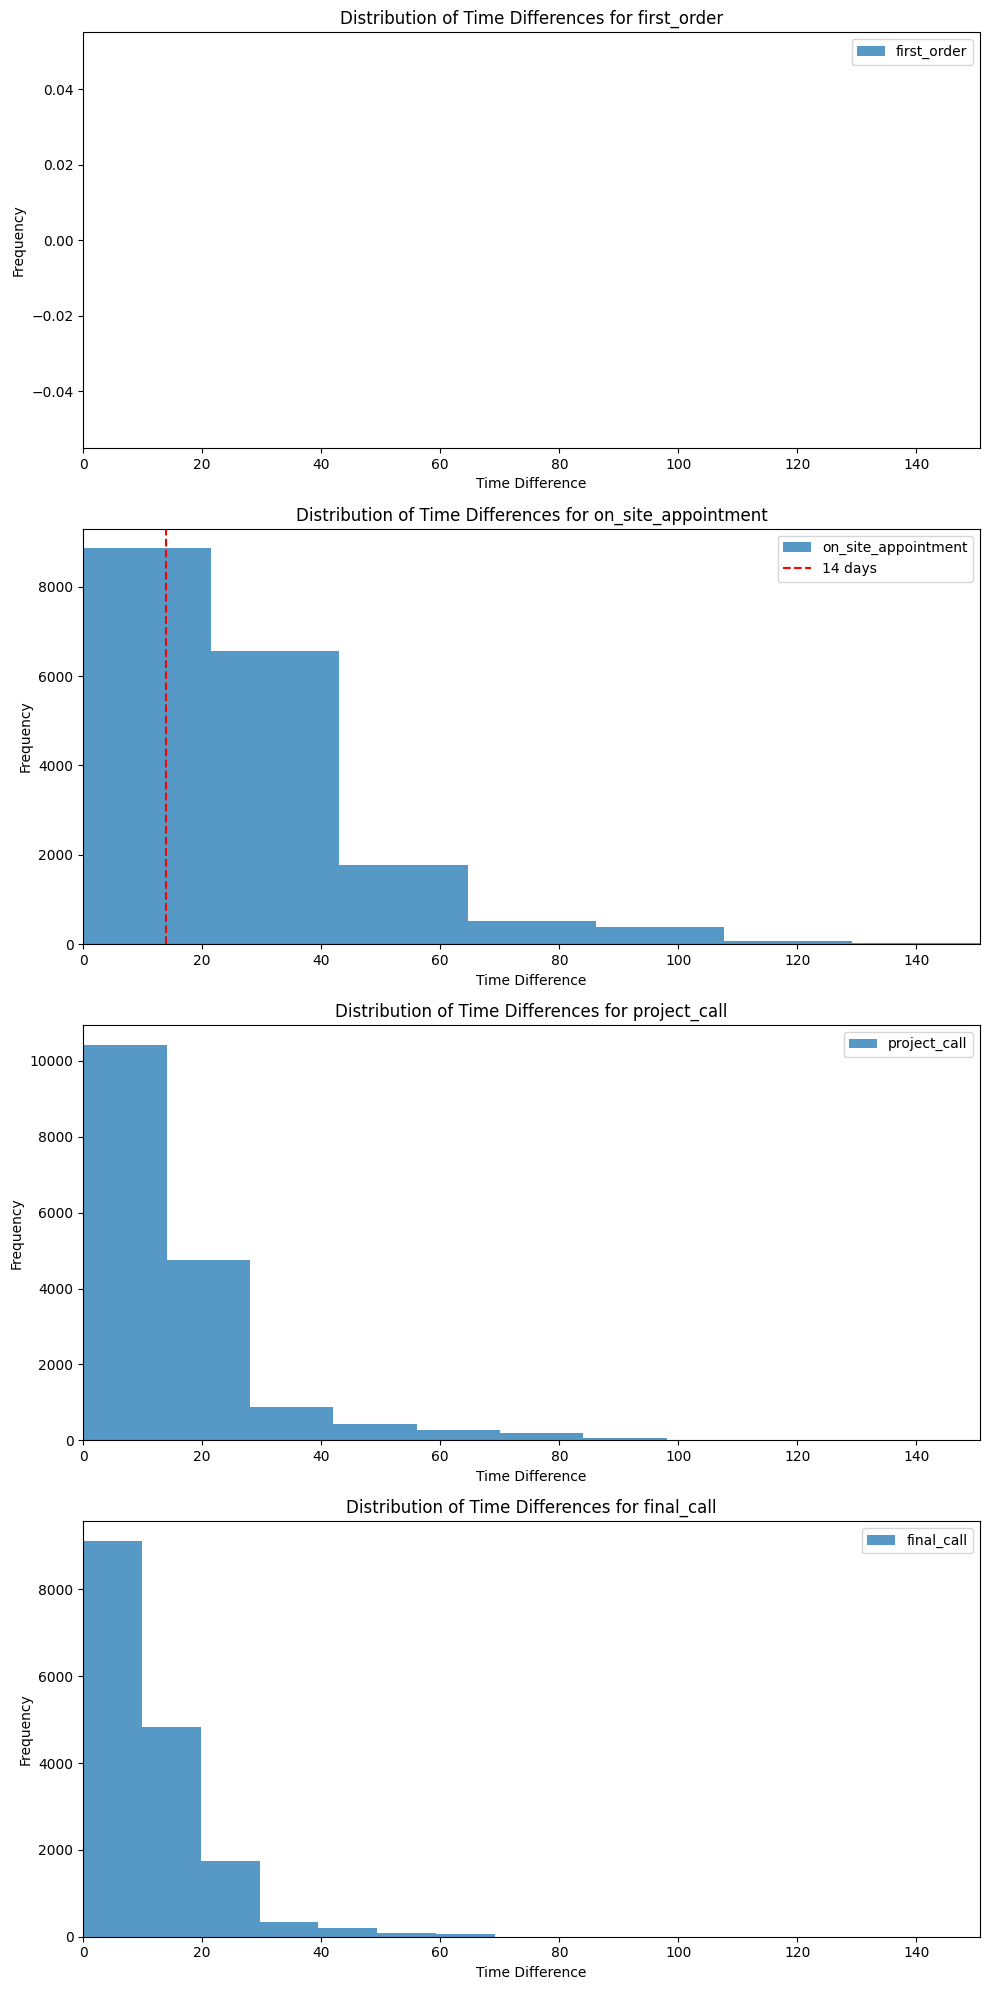

In [90]:
#FILTERED

# Get unique event names
event_names = filtered_df['event_name'].unique()

x_min = filtered_df['time_difference_events'].min()
x_max = filtered_df['time_difference_events'].max()

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(event_names), figsize=(10, 5 * len(event_names)))


# Plot each event in a separate subplot
for ax, event in zip(axes, event_names):
    subset = filtered_df[filtered_df['event_name'] == event]
    ax.hist(subset['time_difference_events'].dropna(), bins=7, alpha=0.75, label=str(event))
    ax.set_title(f'Distribution of Time Differences for {event}')
    ax.set_xlabel('Time Difference')
    ax.set_ylabel('Frequency')
    ax.legend()

    ax.set_xlim(x_min, x_max)
    if event == 'on_site_appointment':
        ax.axvline(x=14, color='r', linestyle='--', label='14 days')
        ax.legend()

plt.tight_layout()
plt.show()

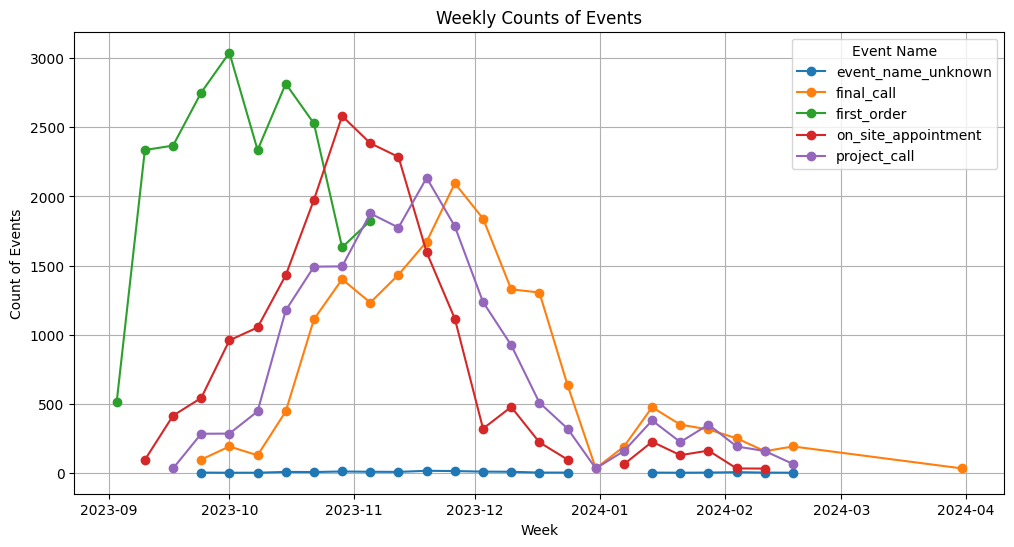

In [56]:
df_time = pd.read_csv('../analysis_table.csv')
df_time['event_time'] = pd.to_datetime(df_time['event_time'])
df_time.set_index('event_time', inplace=True)
event_weekly_counts = df_time.groupby(['event_name', pd.Grouper(freq='W')]).size()
event_weekly_counts = event_weekly_counts.reset_index(name='count')

pivot_data = event_weekly_counts.pivot(index='event_time', columns='event_name', values='count')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Weekly Counts of Events')
plt.xlabel('Week')
plt.ylabel('Count of Events')
plt.legend(title='Event Name')
plt.grid(True)
plt.show()

In [57]:
#Check final order
max_date_first_order=df[df['event_name']== 'first_order']['event_time'].max()
max_date_first_order

'2023-11-01 04:00:00'

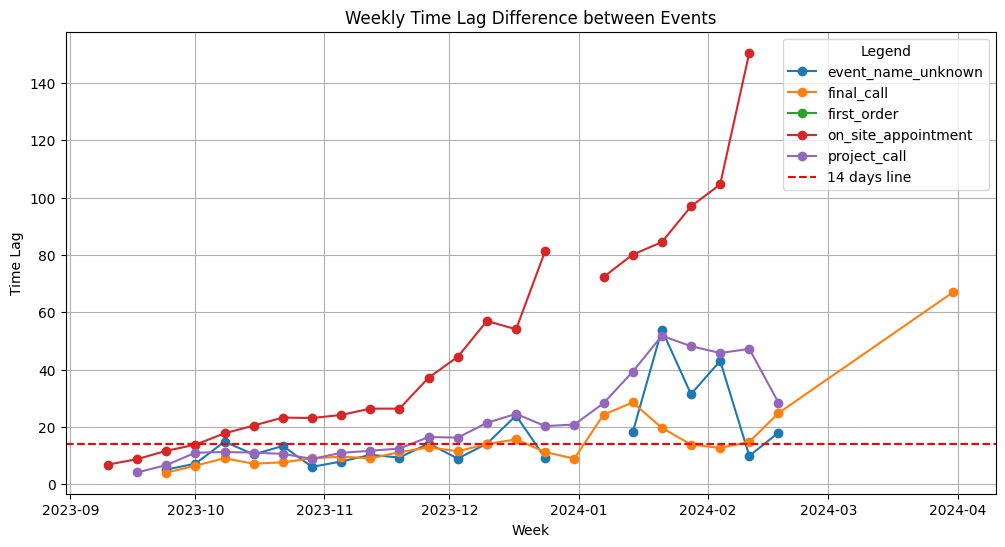

In [100]:
df_time = pd.read_csv('../analysis_table.csv')
df_time['event_time'] = pd.to_datetime(df_time['event_time'])
df_time.set_index('event_time', inplace=True)
event_weekly_time_difference = df_time.groupby(['event_name', pd.Grouper(freq='W')])['time_difference_events'].mean()
event_weekly_counts = event_weekly_time_difference.reset_index(name='time_difference_events')

pivot_data = event_weekly_counts.pivot(index='event_time', columns='event_name', values='time_difference_events')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Weekly Time Lag Difference between Events')
plt.xlabel('Week')
plt.ylabel('Time Lag')
plt.axhline(y=14, color='r', linestyle='--', label='14 days line')
plt.grid(True)
plt.legend(title='Legend')
plt.show()


/var/folders/m8/mtfhq9yn11l785hjqrbqdmnc0000gn/T/ipykernel_78780/2055769234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['event_time'] = pd.to_datetime(df_time['event_time'])


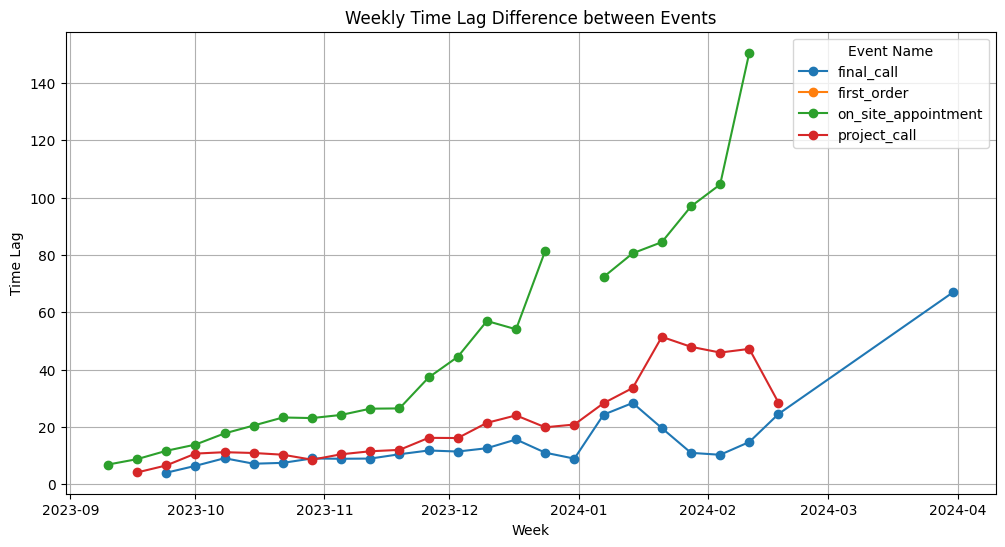

In [88]:
#only with filtered data
df_time = filtered_df
df_time['event_time'] = pd.to_datetime(df_time['event_time'])
df_time.set_index('event_time', inplace=True)
event_weekly_time_difference = df_time.groupby(['event_name', pd.Grouper(freq='W')])['time_difference_events'].mean()
event_weekly_counts = event_weekly_time_difference.reset_index(name='time_difference_events')

pivot_data = event_weekly_counts.pivot(index='event_time', columns='event_name', values='time_difference_events')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Weekly Time Lag Difference between Events')
plt.xlabel('Week')
plt.ylabel('Time Lag')
plt.legend(title='Event Name')
plt.grid(True)
plt.show()

/var/folders/m8/mtfhq9yn11l785hjqrbqdmnc0000gn/T/ipykernel_78780/3724765237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_final_call['event_time'] = pd.to_datetime(df_time_final_call['event_time'])


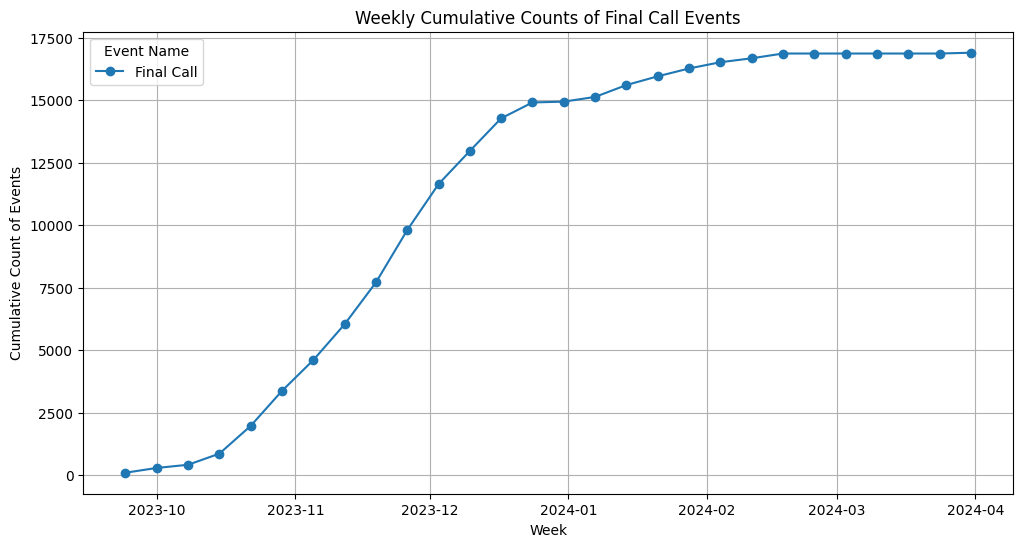

In [71]:
df_group=df.groupby(['event_name','postal_code_group'])['time_difference_events'].agg(['median', 'mean']).reset_index()

df_group_high=df_group[df_group['mean']>14]
df_group_high

,event_name,postal_code_group,median,mean
5,event_name_unknown,5.0,10.265,16.961250
8,event_name_unknown,8.0,11.450,18.591667
9,event_name_unknown,9.0,14.395,20.135000
31,on_site_appointment,0.0,22.340,25.758158
32,on_site_appointment,1.0,23.300,30.244190
33,on_site_appointment,2.0,19.460,25.145819
34,on_site_appointment,3.0,26.430,33.638648
35,on_site_appointment,4.0,21.290,26.603179
36,on_site_appointment,5.0,23.390,25.337150
37,on_site_appointment,6.0,20.590,26.293303
